<div style="text-align: center"><img src="https://img.freepik.com/free-vector/cute-underwater-animals-fish-seahorse-jellyfish-octopus-vector-cartoon-set-aquarium-characters-funny-marine-creatures-puffer-fish-isolated-black-background_107791-10364.jpg?t=st=1727454528~exp=1727458128~hmac=897f710448f4a156c45c9ece16702960931ffd6cc25f1d26c413f5767b0cfc50&w=2000" width="100%" heigh="100%" alt="Retrieve&Re-Rank pipeline"></div>

In this project, we explore various **clustering techniques** on a fish species dataset. Although the true species labels are known, we omit them during the clustering process and only use them later to assess the results.

We employ KMeans, Agglomerative Clustering, DBSCAN, and Gaussian Mixture to identify 9 clusters, representing the 9 distinct species, and then compare the clusters to the true labels.

Clustering is a valuable method in data analysis, uncovering hidden patterns and grouping similar objects based on their features, making it crucial for exploratory research.

Ultimately, we will evaluate how closely each technique matches the actual species, providing insights into the best-performing method for this dataset.

`Clustering` is an unsupervised machine learning method used to group data points into clusters based on similarity. Some popular clustering techniques include:

`1.K-Means Clustering:`
1. Partitions the data into a fixed number of clusters (k).

1. Each data point belongs to the cluster with the nearest mean.

1. Iteratively refines the cluster centroids to minimize the variance within clusters.

2.`Agglomerative Clustering (Hierarchical):`
1. Builds a hierarchy of clusters by repeatedly merging the closest pairs of clusters.
1. Can be visualized using a dendrogram.
1. Does not require specifying the number of clusters beforehand, unlike K-Means.

`3.DBSCAN (Density-Based Spatial Clustering of Applications with Noise):`
1. Groups together points that are closely packed together (points with many nearby neighbors).
1. Points that are isolated from others are considered noise.
1. It can identify clusters of arbitrary shape and size, unlike K-Means.

`4.Gaussian Mixture Model (GMM):`
1. Assumes that the data is generated from a mixture of several Gaussian distributions.
1. Each cluster corresponds to a Gaussian component, and points are assigned probabilistically to these clusters.
1. It’s more flexible than K-Means as it can model elliptical clusters and works well when the data fits a Gaussian distribution.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib inline

palette1 = ["#f72585", "#b5179e", "#7A0CC3", "#560bad", "#330A92", "#3f37c9", "#4361ee", "#4895ef", "#4cc9f0"]
palette2 = ["#2C7B7B", "#004D4A", "#D02748", "#F9E03B",  "#F0C808", "#D5A2D5", "#3E2A63", "#6BC6D3", "#007BA8"]
sns.set_theme(context='notebook', palette=palette2, style='darkgrid')

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv")

# 1.Data Exploration

In [3]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

109

In [8]:
# Remove the dulpicated rows from the DataFrame
df.drop_duplicates(inplace=True)

In the code `df.drop_duplicates(inplace=True)`, the argument inplace=True means that the operation will be performed directly on the original DataFrame (df) without creating a new copy.

Effect:
With `inplace=True`: The DataFrame is modified in place, meaning that the duplicate rows are removed from df itself, and no new object is returned.
Without `inplace=True`: A new DataFrame with duplicates removed is created and returned, leaving the original DataFrame (df) unchanged unless explicitly reassigned (e.g., df = df.drop_duplicates()).

In [9]:
df.shape

(3971, 4)

In [10]:
X = df.drop('species', axis=1)
y = df.species

In [11]:
# Detecting Outliers

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(X))

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores


,length,weight,w_l_ratio
count,3971.000,3971.000,3971.000
mean,-0.000,-0.000,-0.000
std,1.000,1.000,1.000
min,-1.554,-1.629,-1.404
25%,-0.846,-0.639,-0.670
50%,0.003,-0.407,-0.507
75%,0.736,0.350,0.717
max,2.339,2.485,3.163


**Initial data exploration reveals the following key points:**

* 🌟 Data Cleanliness: The dataset is very clean and well-prepared for analysis.
* ✅ Missing Values: There are no missing values in the dataset.
* 🔢 Numerical Features: The dataset includes 3 numerical feature columns.
* 🔄 Duplicates Removed: We found 109 duplicates, which have been dropped.
* 📉 Row Adjustment: After dropping, the dataset now contains 3,971 rows.
* 🚫 Outliers: There are no outliers present in the dataset.

# 2.Data Visualization

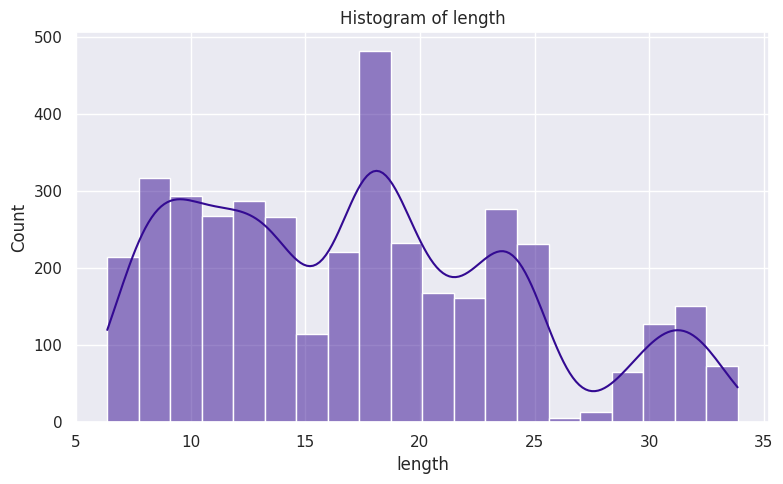

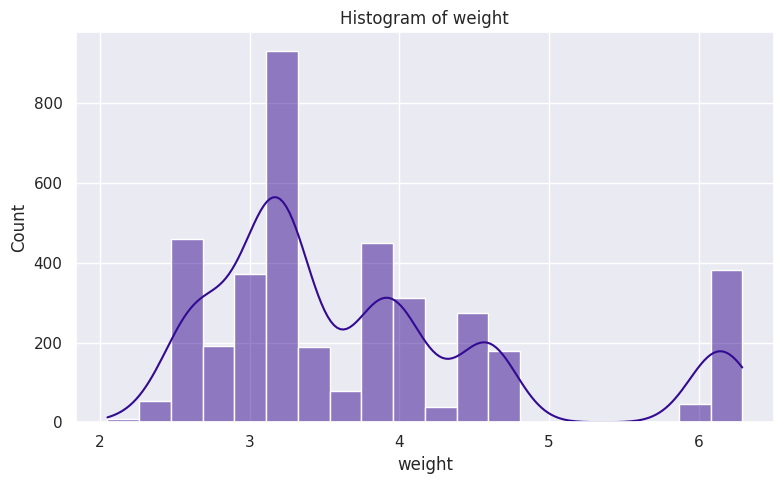

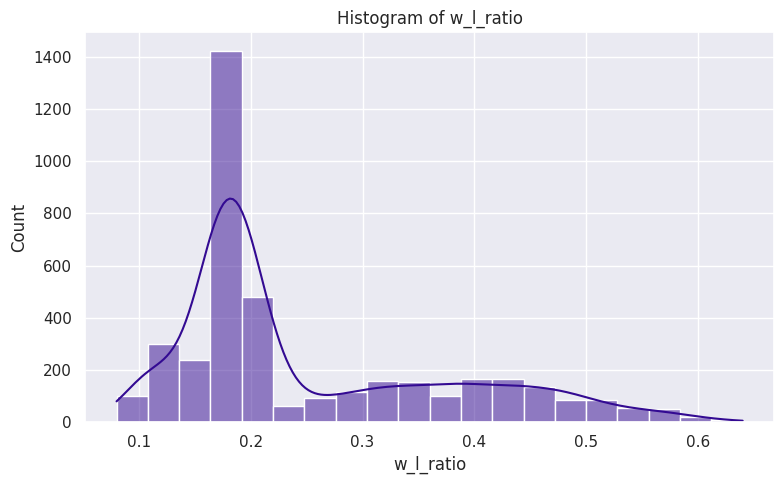

In [12]:
# Plot histograms for each column

for column in X:
    
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=column, kde=True, bins=20, color=palette1[4])
    plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

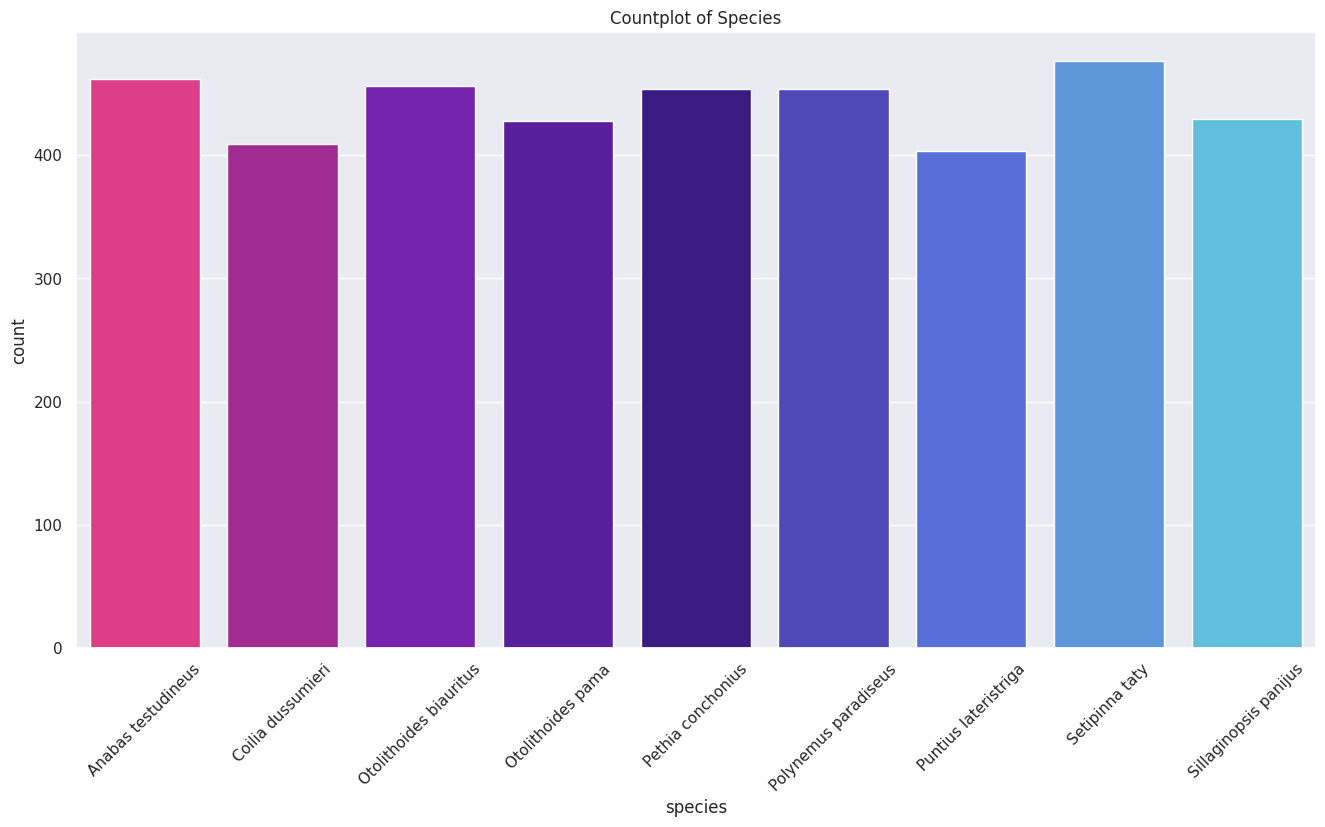

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='species', palette=palette1)
plt.title(f'Countplot of Species')
plt.xticks(rotation=45)

plt.show()

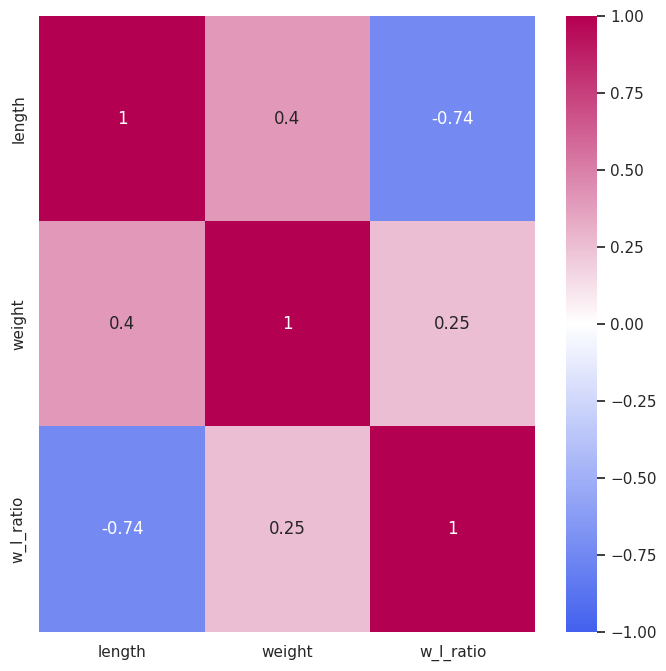

In [14]:
# Define the custom colormap
colors = ["#4361EE", "#FFFFFF", "#B40051"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df = df.corr(numeric_only = True)

# Plotting the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_df, cmap=cmap, center = 0, vmin=-1, annot=True)
plt.show()

In the line `vmin=-1`:

`vmin` is a parameter used in the `sns.heatmap()` function to set the `minimum value` for the `colormap scale`.
By setting `vmin=-1`, you are explicitly defining the minimum value for the heatmap's color scale to be -1.

This is particularly useful for correlation matrices because `correlation values` range from `-1 to 1`:

`-1` indicates a perfect negative correlation.
`1` indicates a perfect positive correlation.
`0` means no correlation.

By setting vmin=-1, you ensure that the heatmap scale covers the `full possible range of correlation values`, and your colormap will reflect the variations between negative and positive correlations effectively.

In summary:

`vmin=-1` ensures that -1 is the lowest value displayed on the heatmap's color scale, making the visualization more accurate and intuitive for interpreting correlation values.


#  3.Clustering Algorithms

In [15]:
# Instantiate Scaler
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(X)

<div style="background-color: green; color: black; padding: 10px; border-radius: 10px; font-size: 23px;">
  3.1 KMeans
</div>

In [16]:
# Initialize the KMeans algorithm with 9 clusters and a maximum of 100 iterations
kmeans = KMeans(n_clusters=9, max_iter=100)

# Fit the model and predict cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

In [17]:
# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

pd.DataFrame(X_transformed, columns=X.columns).head()

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31


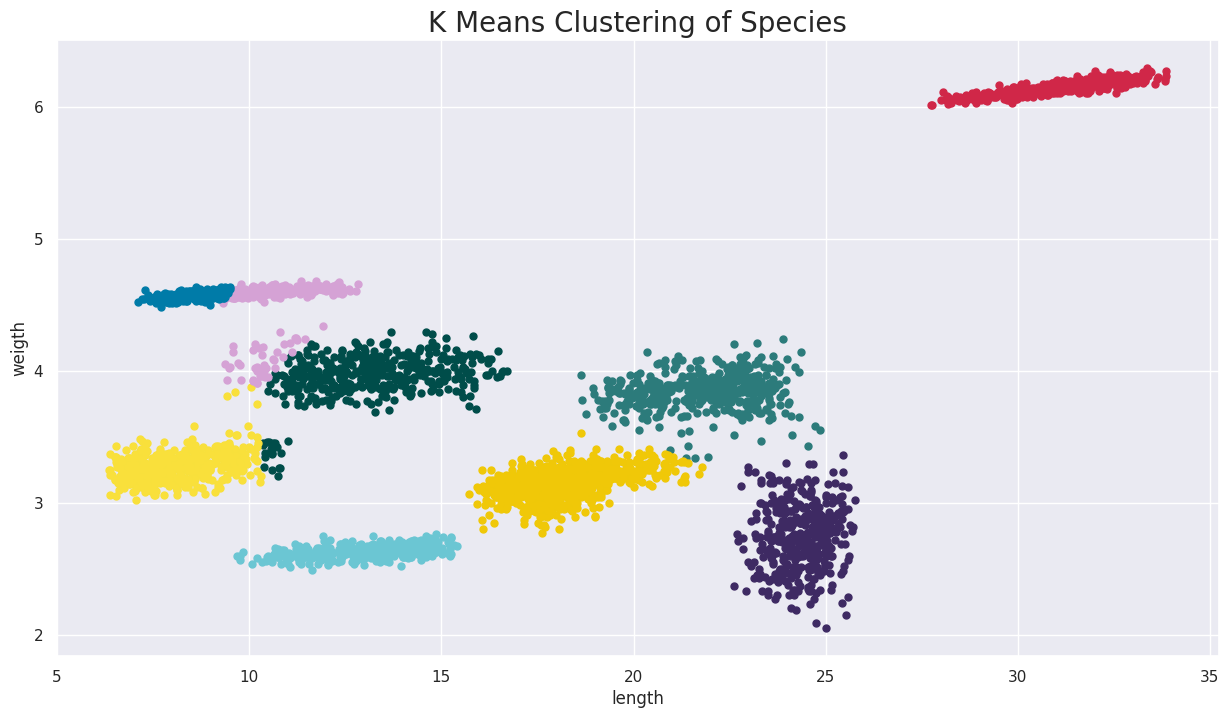

In [18]:
# Visualising the clusters
plt.figure(figsize= (15,8))

for i in range(9):
    plt.scatter(X_transformed[y_kmeans == i, 0], X_transformed[y_kmeans == i, 1], s=25)

plt.title('K Means Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weigth')

plt.show()

<div style="background-color: green; color: black; padding: 10px; border-radius: 10px; font-size: 23px;">
  3.2Agglomerative Clustering
</div>

In [19]:
# Initialize the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=9)

# Fit the model and predict cluster labels
y_agg = agg_clustering.fit_predict(X_scaled)

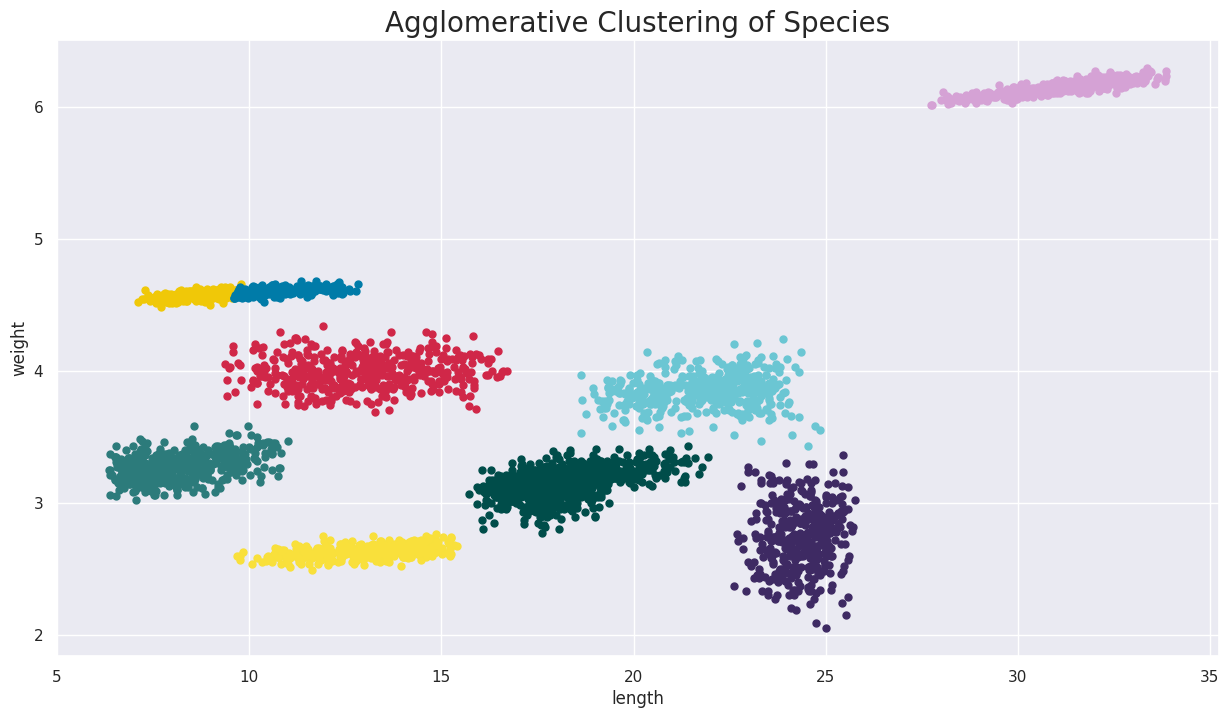

In [20]:
# Visualize the clusters
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_agg == i, 0], X_transformed[y_agg == i, 1], s=25)

plt.title('Agglomerative Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<div style="background-color: green; color: black; padding: 10px; border-radius: 10px; font-size: 23px;">
  3.3Gaussian Mixture
</div>

In [21]:
# Initialize Gaussian Mixture Model with 9 clusters
gmm = GaussianMixture(n_components=9, random_state=101)

# Fit the model and predict cluster labels
y_gmm = gmm.fit_predict(X_scaled)

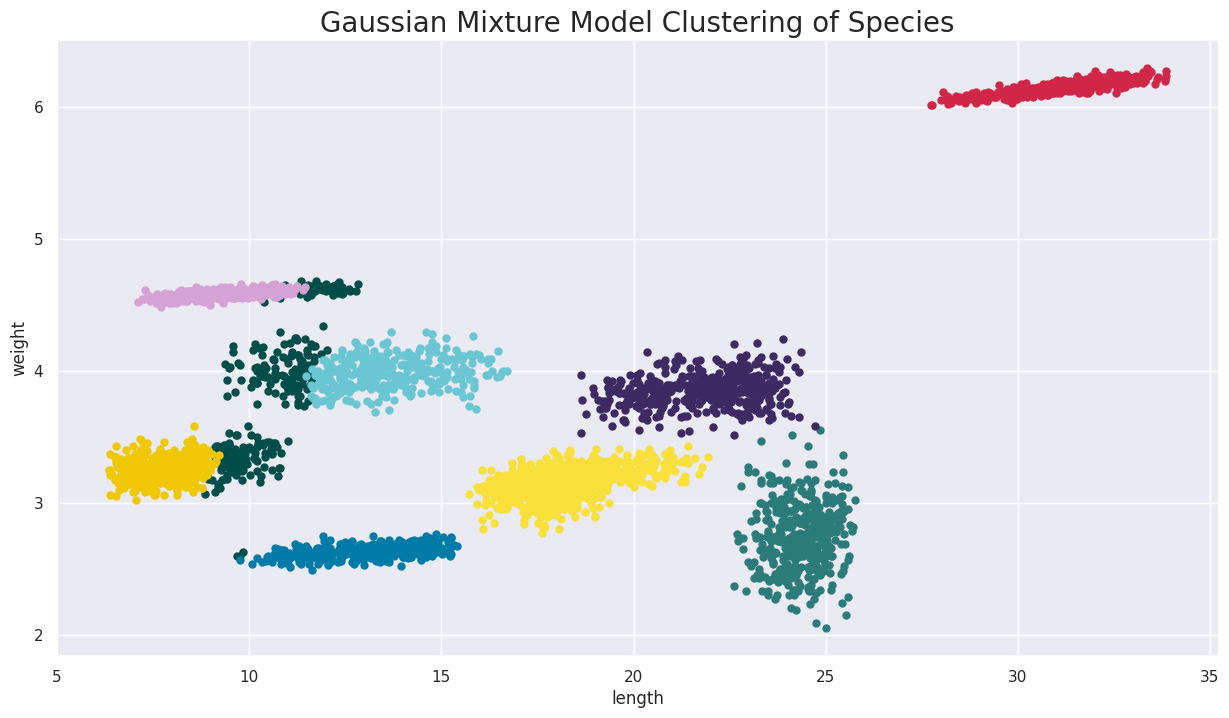

In [22]:
# Visualize the clusters
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_gmm == i, 0], X_transformed[y_gmm == i, 1], s=25)

plt.title('Gaussian Mixture Model Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<div style="background-color: green; color: black; padding: 10px; border-radius: 10px;font-size: 23px;">
  3.4 DBSCAN
</div>

In [23]:
# Initialize DBSCAN (adjusted eps and min_samples)
dbscan = DBSCAN(eps=0.03, min_samples=5)

# Fit the model and predict cluster labels
y_dbscan = dbscan.fit_predict(X_scaled)

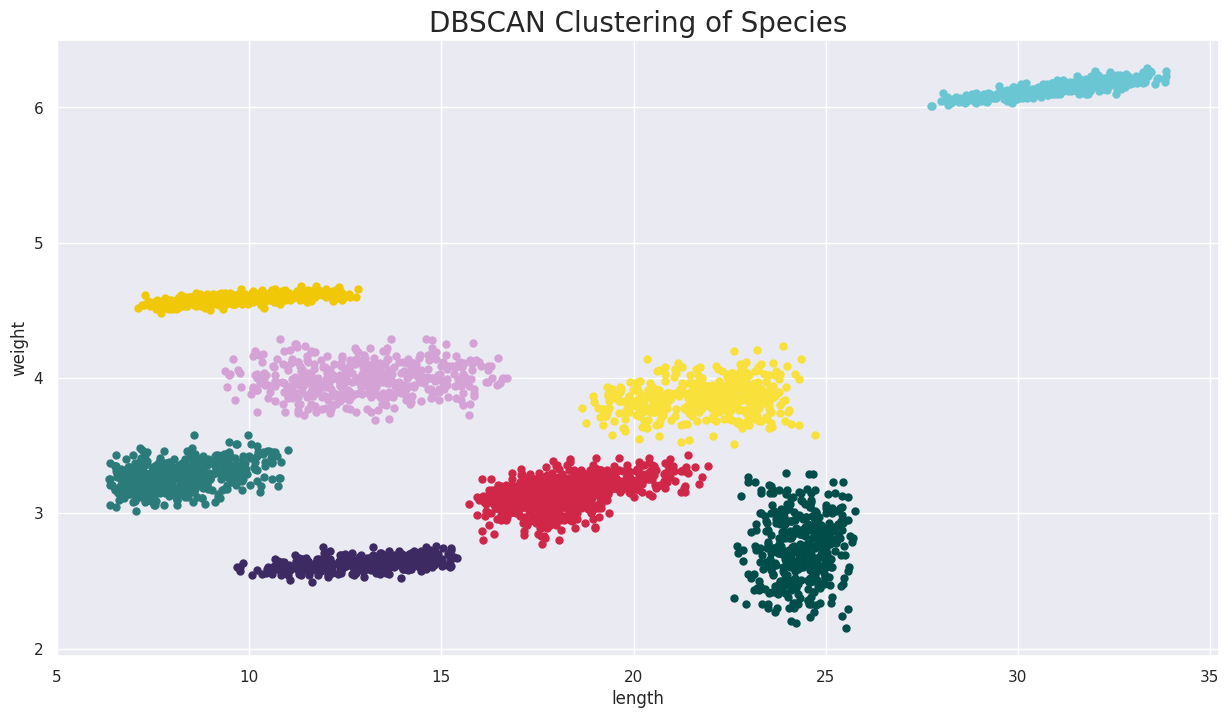

In [24]:
# Visualize the clusters (Note: DBSCAN might have noise points labeled as -1)
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_dbscan == i, 0], X_transformed[y_dbscan == i, 1], s=25)

plt.title('DBSCAN Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<div style="background-color: pink; color: black; padding: 3px; border-radius: 10px; font-size: 18px;">
  Credit
</div>



https://www.kaggle.com/code/annastasy/fish-clustering-diverse-techniques